# Random Forest Project 

For this project I will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. I will try to create a model that will help predict this.

**We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.**

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## The Data

**Use pandas to read loan_data.csv as a dataframe called loans.**

In [2]:
df = pd.read_csv('loan_data.csv')

**Check out the info(), head(), and describe() methods on loans.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

In [7]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

### Gaining an understanding of the unique values in each column.

In [20]:
for i in df.columns:
    if len(df[i].unique()) < 12:
        
        print('There are ',len(df[i].unique()), 'unique values for {}:'.format(i))
        print(df[i].unique())
        print('')
              
    else:
        print('There are ',len(df[i].unique()), 'unique values for {}'.format(i))
        print('')

There are  2 unique values for credit.policy:
[1 0]

There are  7 unique values for purpose:
['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']

There are  249 unique values for int.rate

There are  4788 unique values for installment

There are  1987 unique values for log.annual.inc

There are  2529 unique values for dti

There are  44 unique values for fico

There are  2687 unique values for days.with.cr.line

There are  7869 unique values for revol.bal

There are  1035 unique values for revol.util

There are  28 unique values for inq.last.6mths

There are  11 unique values for delinq.2yrs:
[ 0  1  2  4  3  5  6 13  7  8 11]

There are  6 unique values for pub.rec:
[0 1 2 3 4 5]

There are  2 unique values for not.fully.paid:
[0 1]



**Plotting some distributions**

<AxesSubplot:xlabel='fico', ylabel='Count'>

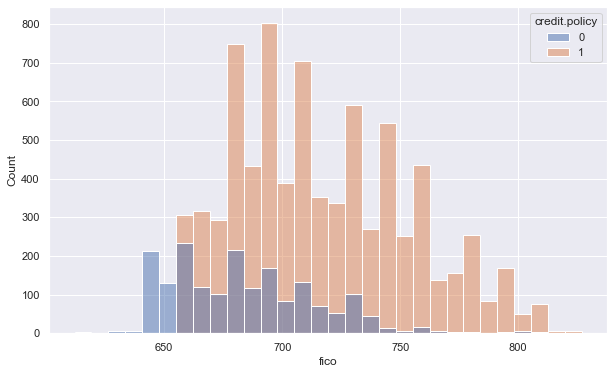

In [43]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='fico', hue='credit.policy', bins=30)

**Note: those who meet the credit underwriting critera tend to have a higher credit score**

<AxesSubplot:xlabel='fico', ylabel='Count'>

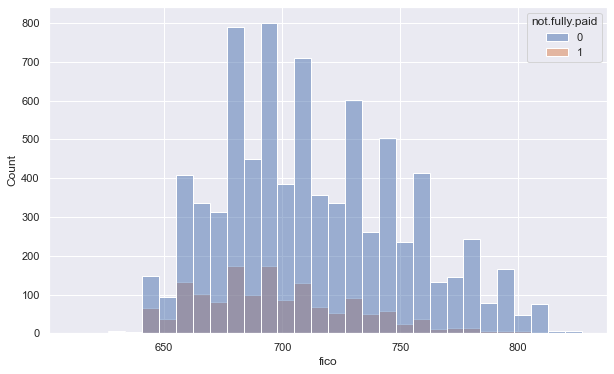

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='fico', hue='not.fully.paid', bins=30)

**Note: Those who have paid off their credit tend to fit inside the FICO credit score distribution.  Having a high credit score does not appear to determine if the customer will pay off their credit**

In [35]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

<AxesSubplot:xlabel='purpose', ylabel='count'>

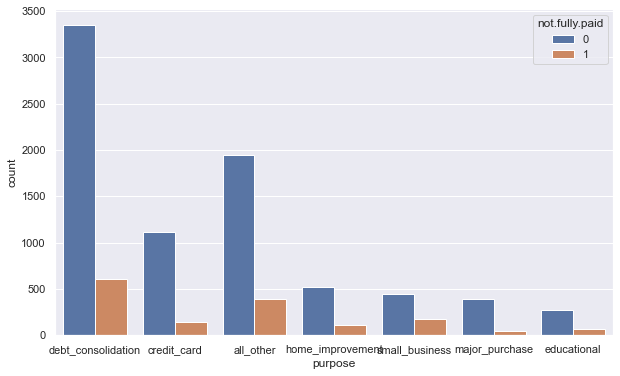

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='purpose', hue='not.fully.paid')

**Debt consolidation is the primary purpose of those who have not fully paid off their credit**

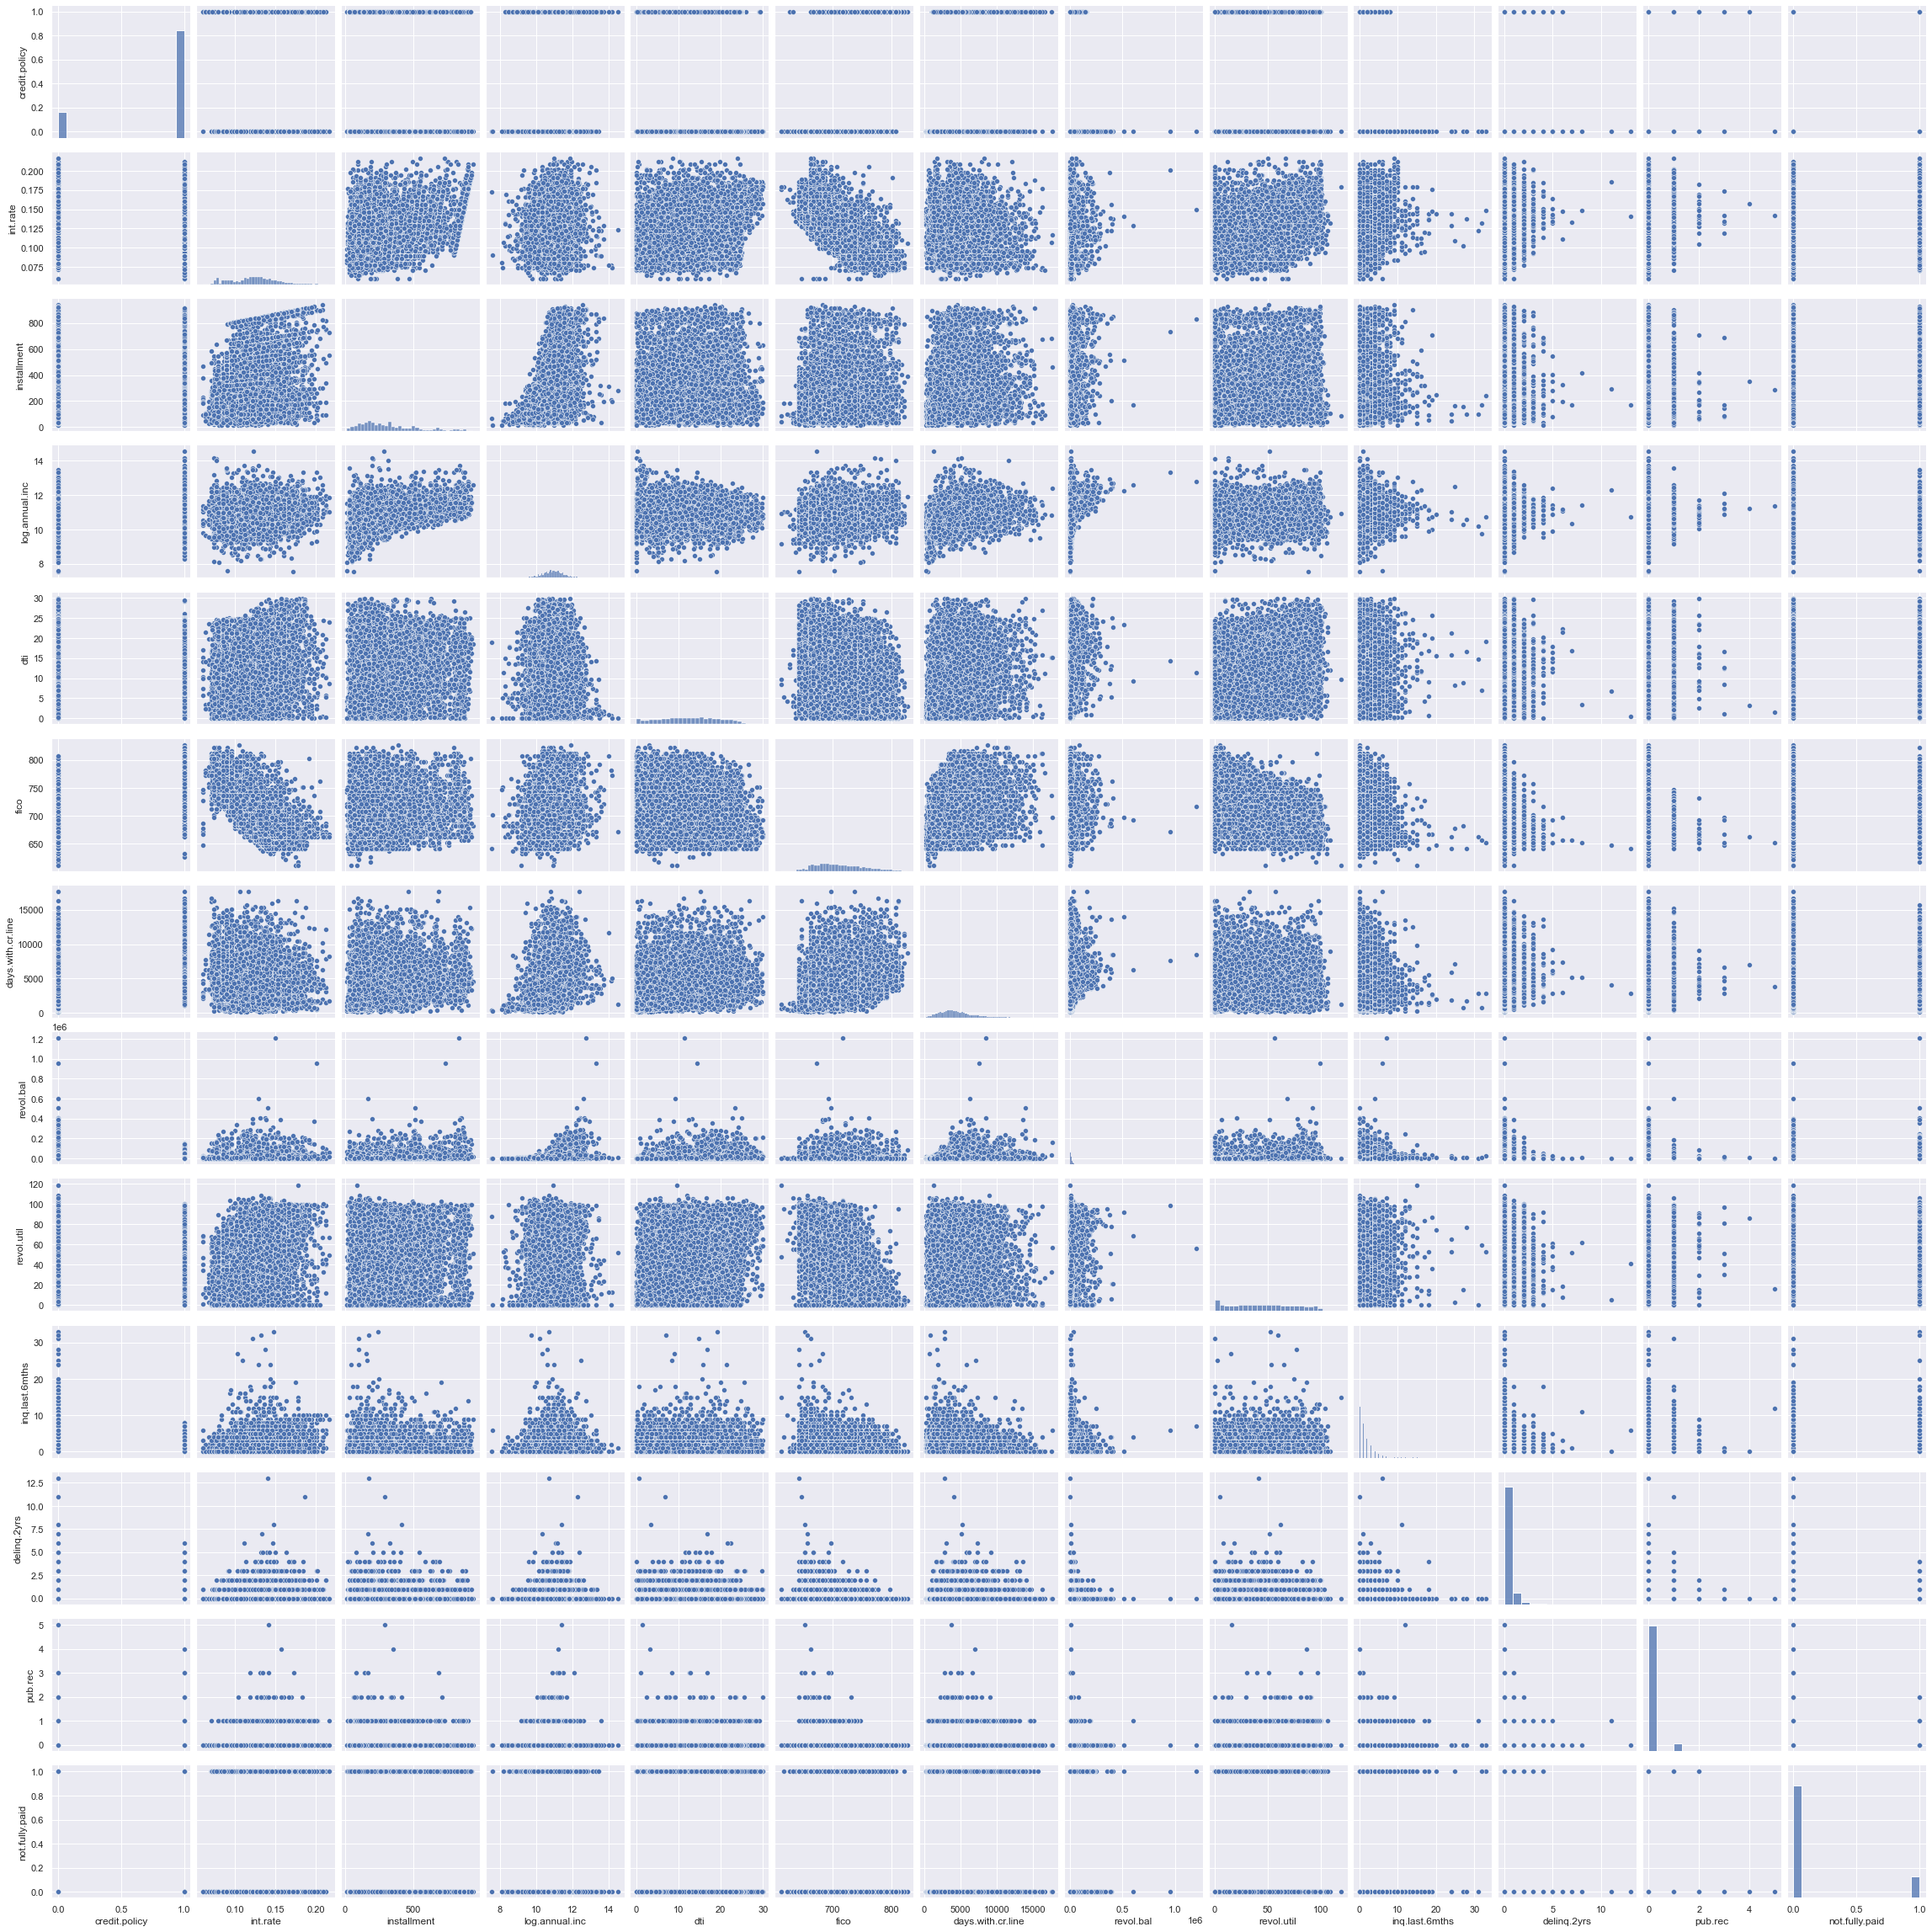

In [38]:
sns.pairplot(df, diag_kind='hist')

**There appears to be a trend with FICO score and interest rate**

<AxesSubplot:xlabel='fico', ylabel='int.rate'>

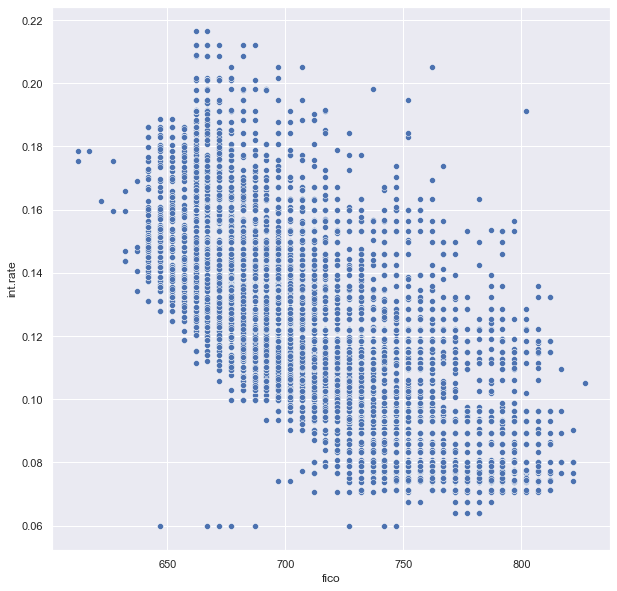

In [42]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x='fico',y='int.rate')

**As one would expect, as credit score increases, interest rates tend to decrease**

<Figure size 864x720 with 0 Axes>

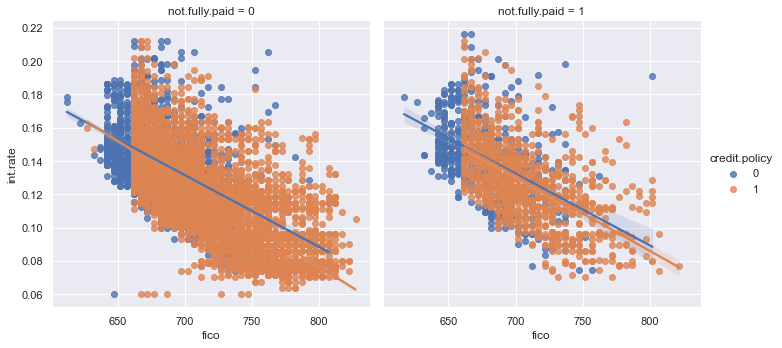

In [40]:
plt.figure(figsize=(12,10))
sns.lmplot(data=df, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid')

**There does not appear to be much to gain from splitting the scatter plots between fully paid or not and credit policy does not seem to influence anything either**

# Setting up the Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

This needs to transform by using dummy variables. 

In [44]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [48]:
cat_feats = ['purpose']
cat_feats

['purpose']

**Use pd.get_dummies(df,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables.  One of the categorical variables will be dropped**

In [49]:
df1 = pd.get_dummies(df, columns=cat_feats,drop_first=True)
df1

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


## Train Test Split

**Use sklearn to split your data into a training set and a testing set**

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
df1.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [60]:
X = df1.drop('not.fully.paid', axis=1)
y = df1['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Training a Decision Tree Model


**Import DecisionTreeClassifier**

In [61]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [85]:
dtree = DecisionTreeClassifier()

In [86]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [87]:
y_pred = dtree.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2408
           1       0.20      0.21      0.21       466

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.74      2874



In [90]:
confusion_matrix(y_test,y_pred)

array([[2003,  405],
       [ 366,  100]], dtype=int64)

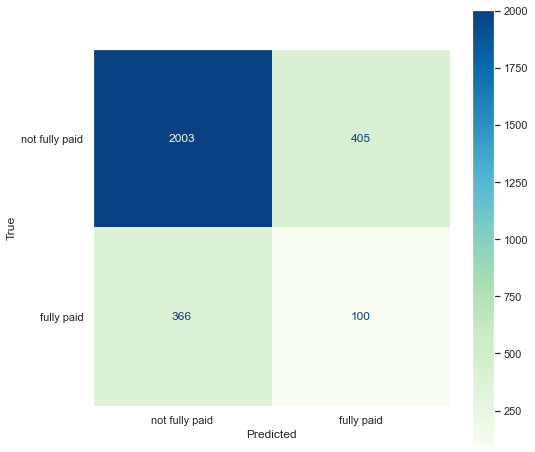

In [91]:
cm = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['not fully paid','fully paid'])
fig, ax = plt.subplots(figsize=(8,8))
cmd.plot(include_values=True, cmap='GnBu', ax=ax)
cmd.ax_.set(xlabel='Predicted', ylabel='True', autoscale_on=True)
plt.grid(visible=None)

## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rfc = RandomForestClassifier(n_estimators=600)

In [94]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [95]:
y_pred = rfc.predict(X_test)

**Now create a classification report from the results.**

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.37      0.02      0.03       466

    accuracy                           0.84      2874
   macro avg       0.60      0.51      0.47      2874
weighted avg       0.76      0.84      0.77      2874



**Show the Confusion Matrix for the predictions.**

In [97]:
print(confusion_matrix(y_test,y_pred))

[[2396   12]
 [ 459    7]]


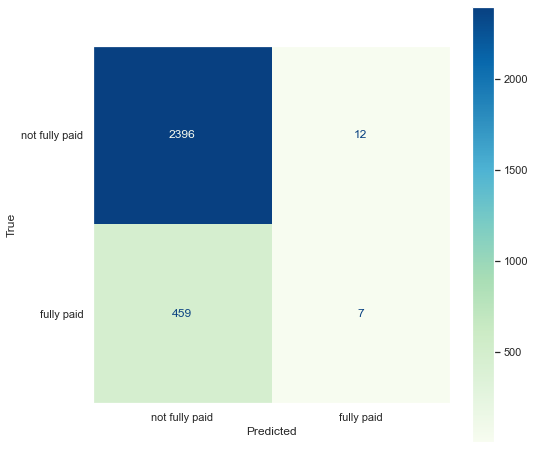

In [98]:
cm = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['not fully paid','fully paid'])
fig, ax = plt.subplots(figsize=(8,8))
cmd.plot(include_values=True, cmap='GnBu', ax=ax)
cmd.ax_.set(xlabel='Predicted', ylabel='True', autoscale_on=True)
plt.grid(visible=None)

# Conclusion

**The Random Forest provided better classification abilities over a single Decision Tree**